<a href="https://colab.research.google.com/github/PascalLarouche/Intelligence-artificielle/blob/main/mnist_chiffres_convnet_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement des modules

In [ ]:
# Sequential permet d'assembler le réseau.
from keras import Sequential
# Pour importer les données directement de Keras.
from keras.datasets import mnist
# Pour encoder les étiquettes.
from keras.utils import to_categorical
# Les 5 types de couches pour construire le réseau.
from keras.layers import Dense, Conv2D, Dropout, Flatten, Input, MaxPooling2D
# Le module de base pour manipuler des données.
import numpy as np
# Le module habituel pour tracer des graphiques.
import matplotlib.pyplot as plt

# Préparation des données

In [ ]:
# Il y a 10 classes différentes.
num_classes = 10
# Les images sont petites et en niveaux de gris.
input_shape = (28, 28, 1)
# Les données MNIST sont comprises dans Keras.
# x_train est l'image et y_train l'étiquette correspondante.
(x_train_brut, y_train), (x_test_brut, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Dimensions de l'ensemble des images d'entraînement : {x_train_brut.shape}")
print(f"Dimensions de l'ensemble des étiquettes d'entraînement : {y_train.shape}")

Dimensions de l'ensemble des images d'entraînement : (60000, 28, 28)
Dimensions de l'ensemble des étiquettes d'entraînement : (60000,)


In [ ]:
# La douzième image du jeu de données est le chiffre 3.
x_train_brut[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 138, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 252, 210, 122,  33,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 220, 254, 254, 254, 235, 189, 189, 189, 189, 150,
        189, 205, 254, 254, 254,  75,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  35,  74,  35,  35,  25,   0,   0,   0,   0,   0,
          0,  13, 224, 254, 254, 153,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  90, 254, 254, 247,  53,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
        152, 246, 254, 254,  49,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 158,
        254, 254, 249, 103,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 251, 254,
        254, 254, 248,  74,   5,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 140, 254, 254,
        254, 254, 254, 254, 202, 125,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 181, 234,
        254, 254, 254, 254, 254, 254, 252, 140,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,
         50,  73, 155, 253, 254, 254, 254, 254, 191,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  91, 200, 254, 254, 254, 254, 118,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   4, 192, 254, 254, 254, 154,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 141, 254, 254, 254, 116,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 126,  86,   0,   0,
          0,   0,   0,   0,   3, 188, 254, 254, 250,  61,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  24, 209, 254,  15,   0,   0,
          0,   0,   0,  23, 137, 254, 254, 254, 209,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 168, 254, 254,  48,   9,   0,
          0,   9, 127, 241, 254, 254, 255, 242,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 101, 254, 254, 254, 205, 190,
        190, 205, 254, 254, 254, 254, 242,  67,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  33, 166, 254, 254, 254, 254,
        254, 254, 254, 254, 250, 138,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# La douzième étiquette est 3 : ce n'est pas un vecteur.
y_train[12]

3

In [ ]:
x_train_brut[1].shape

(28, 28)

In [ ]:
# Les données doivent toujours est normalisées (varier entre 0 et 1).
x_train = x_train_brut.astype("float32") / 255
x_test = x_test_brut.astype("float32") / 255

In [ ]:
x_train[1].shape

(28, 28)

In [ ]:
x_train_brut[1,12,7]

7

In [ ]:
x_train[1,12,7]

0.02745098

In [ ]:
7/255

0.027450980392156862

In [ ]:
# Transformation des images dans le format approprié.
# Il faut ajouter une dimension afin que les images soient des tenseurs.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train dimensions:", x_train.shape)
print(x_train.shape[0], "échantillons entraînement")
print(x_test.shape[0], "échantillons test")

x_train dimensions: (60000, 28, 28, 1)
60000 échantillons entraînement
10000 échantillons test


In [ ]:
x_train[1,12].shape

(28, 1)

In [ ]:
x_train[1,12]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02745098],
       [0.69803923],
       [0.9882353 ],
       [0.9411765 ],
       [0.2784314 ],
       [0.07450981],
       [0.10980392],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.99215686],
       [0.9882353 ],
       [0.7647059 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

# Création des étiquettes

In [ ]:
# La méthode to_categorical permet l'encodage «one-hot».
# La méthode est valable si les catégories sont représentées par des entiers.
a = to_categorical([0, 1, 2, 3], num_classes=4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train[12]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Construction du réseau

In [ ]:
# L'API Sequential rend possible l'assemblage d'un réseau de neurones.
# À ce stade, seulement le réseau est défini ; l'entraînement s'accomplira plus tard.
# Il est possible d'éviter le pooling et de la remplacer par un stride.
modele = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(16, kernel_size=(3, 3), strides=(2,2), activation="relu", padding='same'),
        #MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), strides=(2,2), activation="relu", padding='same'),
        #MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation="relu", padding='same'),
        Flatten(),
        Dropout(0.2),
        Dense(num_classes, activation="softmax"),
    ]
)

# La méthode summary affiche un résumé du réseau.
modele.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dropout (Dropout)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                15690     
                                                                 
Total params: 29738 (116.16 KB)
Trainable params: 29738 

# Entraînement du réseau

In [ ]:
# L'entraînement sera en calculant une moyenne sur 128 échantillon.
# 15 passage seront effectués sur les paramètres du réseau.
batch_size = 128
epochs = 15
# Le modèle doit être compilé avant d'être entraîné.
modele.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit effectue l'entraînement.
# validation_split=0.1 met de côté 10% des données pour effectuer la validation.
# validation_data=(x_test, y_test) aurait permis d'employer les données prévues à cet effet.
histoire = modele.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 8ms/step - loss: 0.3801 - accuracy: 0.8856 - val_loss: 0.1076 - val_accuracy: 0.9698
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1132 - accuracy: 0.9662 - val_loss: 0.0713 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0799 - accuracy: 0.9751 - val_loss: 0.0552 - val_accuracy: 0.9842
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0487 - val_accuracy: 0.9858
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 

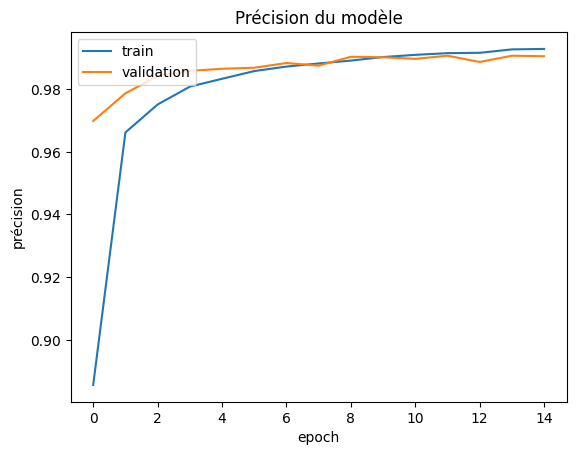

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Précision du modèle")
    plt.ylabel("précision")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(histoire)

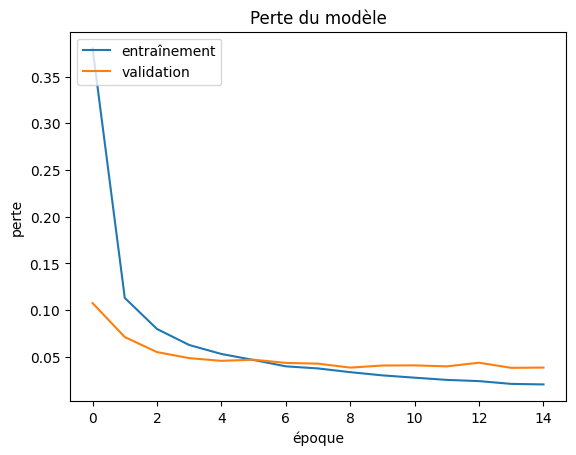

In [ ]:
def plot_lost(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Perte du modèle")
    plt.ylabel("perte")
    plt.xlabel("époque")
    plt.legend(["entraînement", "validation"], loc="upper left")
    plt.show()


plot_lost(histoire)

# Validation du réseau

In [ ]:
# evaluate valide le réseau sur des données inutilisées pour l'entraînement.
modele.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9891


[0.03589145094156265, 0.9890999794006348]